In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [2]:
#IMPORT DATASET
df = pd.read_csv("/Users/Rashad/Documents/GitHub/Project-1-Revisited/Data/sales_predictions ORIGINAL.csv")
display( df.head() )
print()
display( df.describe(include='number') )
print()
display( df.info() )

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

# INSPECTING DATA

In [3]:
df_backup = df.copy()   #Making backup copy of original untouched dataframe.
df.duplicated().sum()   #Checking the total number of duplicated rows of data.

0

In [4]:
df.isna().sum()  #checking for missing (NaN) values.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#Need to explore values of all columns.
for x in df.columns:
  print( f"COLUMN>>> **{x}**" )
  print( df[x].value_counts() )
  print()

COLUMN>>> **Item_Identifier**
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

COLUMN>>> **Item_Weight**
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

COLUMN>>> **Item_Fat_Content**
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

COLUMN>>> **Item_Visibility**
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

COLUMN>>> **Item_Type**
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                 

In [6]:
#Column "Item_Fat_Content" has labels that need to be relabled.
display( df["Item_Fat_Content"].value_counts() )
print()

df["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

display( df["Item_Fat_Content"].value_counts() )   #Confirming modifications.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
#"Outlet_Size" catagory should be changed from "High" to "Large"
display( df["Outlet_Size"].value_counts() )
print()

#Replacing "High" with "Large" in column "Outlet_Size"
df["Outlet_Size"].replace("High","Large",inplace=True)
print()
df["Outlet_Size"].value_counts()   #Confirming modification.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

# Define features (X) and target (y), then perform Train\Test Split of data.

In [8]:
y = df["Item_Outlet_Sales"]   #Target column that we want to predict.

#Droping columns "Item_Identifier" and "Outlet_Identifier" because they are
#not needed for model prediction.
X = df.drop(["Item_Outlet_Sales", "Item_Identifier", "Outlet_Identifier"], axis=1)   #Feature data used to train ML.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [9]:
display( X_train.head() )
X_train.info()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
625,7.475,Low Fat,0.148493,Fruits and Vegetables,240.6854,2004,Small,Tier 2,Supermarket Type1
8175,NaN,Regular,0.016979,Baking Goods,177.0370,1985,Medium,Tier 3,Supermarket Type3
3610,8.365,Regular,0.040070,Fruits and Vegetables,190.7188,2007,NaN,Tier 2,Supermarket Type1
2045,5.260,Regular,0.042009,Baking Goods,162.6868,2007,NaN,Tier 2,Supermarket Type1
2363,11.650,Low Fat,0.040744,Fruits and Vegetables,185.9240,2007,NaN,Tier 2,Supermarket Type1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 625 to 6175
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5300 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Establishment_Year  6392 non-null   int64  
 6   Outlet_Size                4561 non-null   object 
 7   Outlet_Location_Type       6392 non-null   object 
 8   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 499.4+ KB


* Need to impute "Item_Weight" as number to mean
* Need to impute "Outlet_Size" as object to most_frequent

# Creating column transfomers and pipelines to prepare dataset for Machine Learning.

In [10]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

#instantiate SimpleImputers with most_frequent and median strategies
freq_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")

#Instantiate Scaler
scaler = StandardScaler()

#Instantiate One-hot encoder
##ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe = OneHotEncoder(drop="if_binary", sparse=False)

#Instantiate Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)

# create tuples of (imputer, selector) for each datatype
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder="passthrough", verbose_feature_names_out=False)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026E40C31E80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026E40C318E0>)],
                  verbose_feature_names_out=False)

#### Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.

In [11]:
# fit on train
preprocessor.fit(X_train)   #Learn (fit) from training data.

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026E40C31E80>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000026E40C318E0>)],
                  verbose_feature_names_out=False)

In [12]:
#Extracting feature names from Column Transformer.
feature_names = preprocessor.get_feature_names_out()

#Converting X_train and X_test into dataframes.
X_train_df = pd.DataFrame(preprocessor.transform(X_train), columns=feature_names, index=X_train.index)

X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=feature_names, index=X_test.index)

In [13]:
#quick view of newly created dataframe
X_train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Large,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
625,-1.274517e+00,1.580340,1.586932,0.734920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8175,4.218359e-16,-0.950855,0.568333,-1.536592,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3610,-1.063166e+00,-0.506440,0.787290,1.093579,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2045,-1.800518e+00,-0.469123,0.338680,1.093579,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2363,-2.830692e-01,-0.493463,0.710557,1.093579,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# LinearRegression
* Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
* Extract and visualize the coefficients that your model determined.
    * Select the top 3 most impactful features and interpret their coefficients in plain English.
* Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit-learn-compatible regression model using r-squared and RMSE

    Args:
        model (Regressor): Regression Model with a .predict method
        X_train (DataFrame): Training Features
        y_train (Series): Training Target
        X_test (DataFrame): Test Features
        y_test (Series): Test Target
    """

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.

In [16]:
lin_reg = LinearRegression()   #Linear Regression model
lin_reg.fit(X_train_df, y_train)   #fit Linear Regression using X_train_df
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)   #evaluating model with function

Training Data:	R^2= 0.56	RMSE= 1127.39
Test Data:	R^2= 0.57	RMSE= 1130.03


### Extract and visualize the coefficients that your model determined.
* Select the top 3 most impactful features and interpret their coefficients in plain English.

In [17]:
#getting Linear Regression model coefficients
lin_reg_coeffs = pd.Series(lin_reg.coef_, index=feature_names, name='Coefficients')
lin_reg_coeffs.loc['intercept'] = lin_reg.intercept_
lin_reg_coeffs   #quick view of coefficients

Item_Weight                          -6.027144
Item_Visibility                      -6.683816
Item_MRP                            954.766896
Outlet_Establishment_Year           322.082843
Item_Fat_Content_Regular             35.791219
Item_Type_Baking Goods               11.211563
Item_Type_Breads                    -16.878160
Item_Type_Breakfast                 -73.150552
Item_Type_Canned                     54.664620
Item_Type_Dairy                     -63.166435
Item_Type_Frozen Foods              -34.960011
Item_Type_Fruits and Vegetables      41.020411
Item_Type_Hard Drinks                 7.825843
Item_Type_Health and Hygiene        -58.370324
Item_Type_Household                 -39.274265
Item_Type_Meat                       -3.669169
Item_Type_Others                     31.470759
Item_Type_Seafood                    98.544582
Item_Type_Snack Foods                28.656888
Item_Type_Soft Drinks               -47.855378
Item_Type_Starchy Foods              63.929630
Outlet_Size_L

In [18]:
for col in cat_selector(X):
    print(f"For {col}:\n{X[col].unique()}\n")

For Item_Fat_Content:
['Low Fat' 'Regular']

For Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

For Outlet_Size:
['Medium' nan 'Large' 'Small']

For Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

For Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [19]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False, 
                annotate=False, ha='left',va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    """Plots the top_n coefficients from a Series, with optional annotations."""
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    if annotate==True:
        annotate_hbars(ax, ha=ha,va=va,size=size,xytext=xytext,
                       textcoords=textcoords)
    ## return ax in case want to continue to update/modify figure
    return ax

def annotate_hbars(ax, ha='left',va='center',size=12,  xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height()/2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha,va=va,size=size,
                        xytext=xytext, textcoords=textcoords)

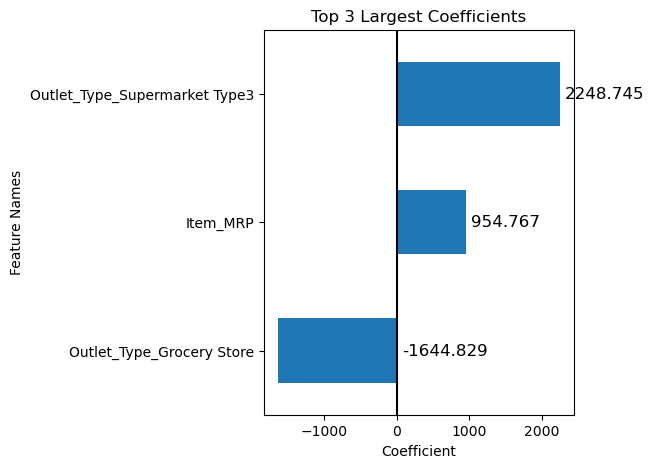

In [20]:
plot_coeffs(lin_reg_coeffs, top_n=3, intercept=False, annotate=True);

* The 3 largest coefficients are:
    1. "Outlet_Type_Supermarket Type3" - If the Outlet Type is of category "Supermarket Type3", the predicted item sales for an outlet with this type increases by 2248.745.
    2. "Item_MRP" - Individual item sale price increased outlet sales by 954.767
    3. "Outlet_Type_Grocery Store" - If the Outlet Type is of category "Grocery Store", the predicted item sales for an outlet with this type decreased by 1644.829.

## Tree-Based Model
* Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.
* Extract and visualize the feature importances that your model determined.
    * Identify the top 5 most important features.
* Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).

### Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()   #Random Forest Regression model
rf_reg.fit(X_train_df, y_train)   #fit Random Forest using X_train_df
evaluate_regression(rf_reg, X_train_df, y_train, X_test_df, y_test)   #evaluating model with function

Training Data:	R^2= 0.94	RMSE= 430.36
Test Data:	R^2= 0.57	RMSE= 1130.49


### Extract and visualize the feature importances that your model determined.
* Identify the top 5 most important features.

In [26]:
#Getting list of feature importances from fitted model.

feature_importance = pd.Series(rf_reg.feature_importances_, index=feature_names, name='Feature Importances')
feature_importance.head()

Item_Weight                  0.054121
Item_Visibility              0.101679
Item_MRP                     0.444029
Outlet_Establishment_Year    0.040066
Item_Fat_Content_Regular     0.007819
Name: Feature Importances, dtype: float64

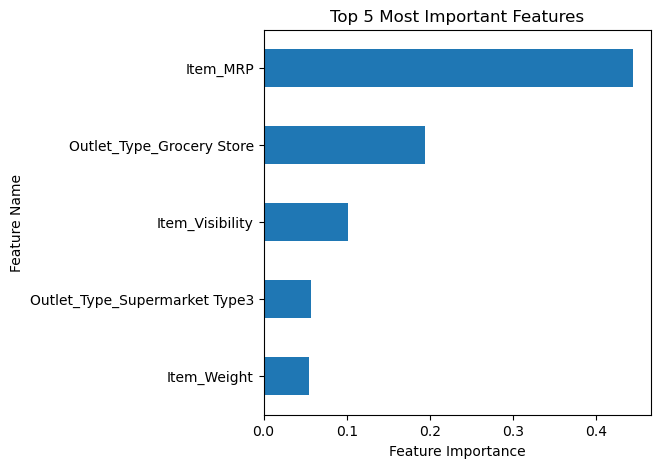

In [28]:
#Visualizing the top 5 feature importances.

ax = feature_importance.sort_values().tail(5).plot(kind='barh', figsize=(5,5))
ax.set(ylabel='Feature Name', xlabel='Feature Importance', title='Top 5 Most Important Features');

The top five most important features are:
1. Item_MRP
2. Outlet_Type_Grocery Store - where Grocery Store is second most important categorical feature used by the model during the training process.
3. Item_Visibility
4. Outlet_Type_Supermarket Type3 - where Supermarket Type3 Store is fourth most important categorical feature used by the model during the training process.
5. Item_Weight

---

What does it mean that they were "important"?
* An "important' feature is one that was used extensively/repeatedly by the model when during the training process. Feature Importance does not indicate directionality.

# Serialize Your Best Models with Joblib

Once you've finished updating and explaining your models, you must save the following key: value pairs as a dictionary in a joblib file named "best-models.joblib":
* "preprocessor": your preprocessing  column transformer
* "X_train": your training features.
* "X_test": your test features.
* "y_train": your training target.
* "y_test": your test target.
* "LinearRegression": your best linear regression
* Your tree-based model's class name: your best tree-based model.
    * e.g. "RandomForestRegressor"/"DecisionTreeRegressor"
* Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)

In [32]:
import joblib

# creating a dictionary of all variables to save for later.
export = {'preprocessor':preprocessor,  #preprocessing column transformer
          'X_train':X_train_df,  #training features
          'X_test':X_test_df,  #test features
          'y_train':y_train,  #training target
          'y_test':y_test,  #test target
          'LinearRegression':lin_reg,  #Linear Regression model
          'RandomForest':rf_reg}  #Random Forest model

joblib.dump(export, 'project1_revisited.joblib')

['project1_revisited.joblib']